In [1]:
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pandas as pd
import numpy as np
import re
import pickle
from collections import namedtuple

%matplotlib inline

In [2]:
model = namedtuple('model', ['shape', 'activation', 'features', 'learning_rate'])

In [3]:
with open('./data/tests.pkl', 'rb') as f:
    data = pickle.load(f)
data.keys(), data['files'][100]

(dict_keys(['files', 'testing', 'training']),
 model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.01'))

In [4]:
shapes = sorted({i.shape for i in data['files']})
print(shapes)

activations = sorted({i.activation for i in data['files']})
print(activations)

features = sorted({i.features for i in data['files']})
print(features)

learning_rates = sorted({i.learning_rate for i in data['files']})
print(learning_rates)

training_keys = sorted(data['training'][data['files'][0]].columns)
print(training_keys)

testing_keys = sorted(data['testing'][data['files'][0]].columns)
print(testing_keys)

['16_12_8', '16_8', '24_16_12_8', '8']
['sigmoid', 'tanh']
['10', '20', '30']
['0.1_0.01', '0.1_0.1', '0.2_0.001', '0.2_0.01', '0.2_0.2']
['accuracy', 'epoch', 'iteration', 'len', 'lr', 'time', 'total_loss']
['test_accuracy', 'test_loss']


# FEATURES

In [5]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['16_8']
        or k.activation not in ['sigmoid']
        or k.features not in ['10', '20', '30']
        or k.learning_rate not in ['0.2_0.001']
       ):
        continue
#     v['test_accuracy'].iloc[::4].plot(label=k)
    print(k)
    l.append(k)
# plt.legend()

model(shape='16_8', activation='sigmoid', features='30', learning_rate='0.2_0.001')
model(shape='16_8', activation='sigmoid', features='10', learning_rate='0.2_0.001')
model(shape='16_8', activation='sigmoid', features='20', learning_rate='0.2_0.001')


Text(0,0.5,'błąd średniokwadratowy')

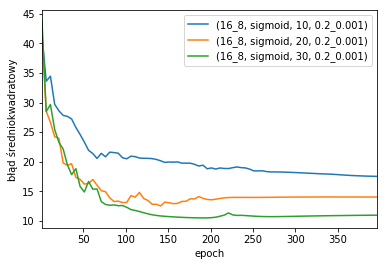

In [6]:
n = 5
data['testing'][l[1]]['test_loss'].iloc[::n].plot(label=l[1])
data['testing'][l[2]]['test_loss'].iloc[::n].plot(label=l[2])
data['testing'][l[0]]['test_loss'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

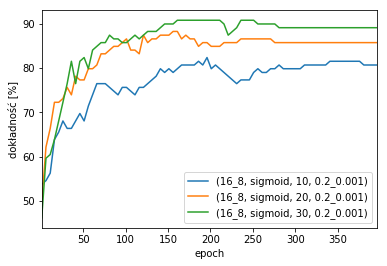

In [7]:
(100 * data['testing'][l[1]])['test_accuracy'].iloc[::n].plot(label=l[1])
(100 * data['testing'][l[2]])['test_accuracy'].iloc[::n].plot(label=l[2])
(100 * data['testing'][l[0]])['test_accuracy'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('dokładność [%]')

In [8]:
df0 = data['testing'][l[0]]
df1 = data['testing'][l[1]]
df2 = data['testing'][l[2]]
print(df1.columns)
df = pd.concat([df1, df2, df0], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.538 & 41.299 & 0.496 & 41.714 & 0.462 & 43.907 \\ \hline
10 & 0.571 & 34.109 & 0.613 & 26.876 & 0.613 & 28.462 \\ \hline
20 & 0.647 & 29.445 & 0.714 & 24.232 & 0.655 & 23.769 \\ \hline
30 & 0.664 & 27.188 & 0.723 & 20.451 & 0.765 & 20.308 \\ \hline
40 & 0.672 & 26.045 & 0.782 & 17.584 & 0.765 & 18.426 \\ \hline
50 & 0.681 & 23.634 & 0.782 & 16.687 & 0.824 & 15.077 \\ \hline
60 & 0.739 & 21.233 & 0.790 & 16.759 & 0.849 & 14.902 \\ \hline
70 & 0.773 & 20.575 & 0.832 & 15.302 & 0.849 & 13.756 \\ \hline
80 & 0.765 & 22.901 & 0.849 & 14.367 & 0.874 & 12.665 \\ \hline
90 & 0.739 & 21.739 & 0.849 & 13.351 & 0.866 & 12.680 \\ \hline
100 & 0.765 & 21.240 & 0.857 & 13.708 & 0.857 & 12.414 \\ \hline
110 & 0.739 & 20.959 & 0.832 & 14.686 & 0.874 & 11.797 \\ \hline
120 & 0.756 & 20.595 & 0.866 & 13.803 & 0.874 & 11.426 \\ \hline
130 & 0.773 & 20.562 & 0.874 & 12.516 & 0.882 & 11.068 \\ \hline
140 & 0.798 & 20.210 & 0.874 & 12.519 & 0.891 &

# ARCH

In [101]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['16_8', '24_16_12_8', '16_12_8', '8']
        or k.activation not in ['sigmoid']
        or k.features not in ['30']
        or k.learning_rate not in ['0.1_0.01']
       ):
        continue
#     v['test_accuracy'].iloc[::4].plot(label=k)
    print(k)
    l.append(k)
# plt.legend()

model(shape='16_12_8', activation='sigmoid', features='30', learning_rate='0.1_0.01')
model(shape='16_8', activation='sigmoid', features='30', learning_rate='0.1_0.01')
model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.1_0.01')
model(shape='8', activation='sigmoid', features='30', learning_rate='0.1_0.01')


Text(0,0.5,'błąd średniokwadratowy')

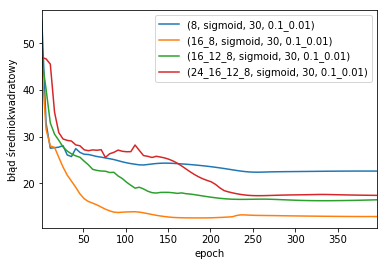

In [102]:
n = 5
data['testing'][l[3]]['test_loss'].iloc[::n].plot(label=l[3])
data['testing'][l[1]]['test_loss'].iloc[::n].plot(label=l[1])
data['testing'][l[0]]['test_loss'].iloc[::n].plot(label=l[0])
data['testing'][l[2]]['test_loss'].iloc[::n].plot(label=l[2])
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

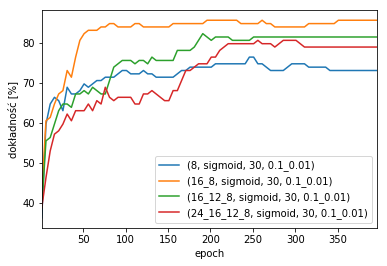

In [103]:
(100 * data['testing'][l[3]])['test_accuracy'].iloc[::n].plot(label=l[3])
(100 * data['testing'][l[1]])['test_accuracy'].iloc[::n].plot(label=l[1])
(100 * data['testing'][l[0]])['test_accuracy'].iloc[::n].plot(label=l[0])
(100 * data['testing'][l[2]])['test_accuracy'].iloc[::n].plot(label=l[2])
plt.legend()
plt.ylabel('dokładność [%]')

In [105]:
df0 = data['testing'][l[0]]
df1 = data['testing'][l[1]]
df2 = data['testing'][l[2]]
df3 = data['testing'][l[3]]
print(df1.columns)
df = pd.concat([df3, df1, df0, df2], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.361 & 54.950 & 0.420 & 45.093 & 0.387 & 46.705 & 0.387 & 46.968 \\ \hline
10 & 0.630 & 28.059 & 0.605 & 28.339 & 0.563 & 33.505 & 0.521 & 46.049 \\ \hline
20 & 0.647 & 28.050 & 0.655 & 26.151 & 0.630 & 29.422 & 0.580 & 31.339 \\ \hline
30 & 0.697 & 26.420 & 0.723 & 22.149 & 0.647 & 27.208 & 0.630 & 29.242 \\ \hline
40 & 0.681 & 27.203 & 0.756 & 19.402 & 0.672 & 25.992 & 0.613 & 28.203 \\ \hline
50 & 0.697 & 26.257 & 0.824 & 16.846 & 0.697 & 24.958 & 0.630 & 27.234 \\ \hline
60 & 0.697 & 26.023 & 0.832 & 15.827 & 0.681 & 23.236 & 0.647 & 27.873 \\ \hline
70 & 0.706 & 25.647 & 0.832 & 15.026 & 0.681 & 22.635 & 0.639 & 27.101 \\ \hline
80 & 0.714 & 25.314 & 0.840 & 14.182 & 0.714 & 22.061 & 0.647 & 26.490 \\ \hline
90 & 0.723 & 24.919 & 0.840 & 13.757 & 0.748 & 21.656 & 0.655 & 27.194 \\ \hline
100 & 0.731 & 24.451 & 0.840 & 13.870 & 0.756 & 20.421 & 0.664 & 26.650 \\ \hline
110 & 0.723 & 24.131 & 0.849 & 13.930 & 0.773 & 19.475 

# tanh feat

model(shape='24_16_12_8', activation='tanh', features='10', learning_rate='0.1_0.01')
model(shape='24_16_12_8', activation='tanh', features='30', learning_rate='0.1_0.01')
model(shape='24_16_12_8', activation='tanh', features='20', learning_rate='0.1_0.01')


3

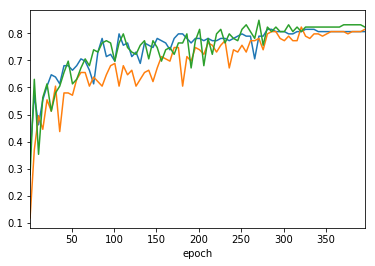

In [111]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['24_16_12_8']
        or k.activation not in ['tanh']
#         or k.features not in ['30']
#         or k.learning_rate not in ['0.2_0.01']
        or v['test_accuracy'].iloc[-1] < .8
#         or v['test_accuracy'].max() > .3
       ):
        continue
    v['test_accuracy'].iloc[::5].plot(label=k)
#     print(k)
    l.append(k)
# plt.legend()
for i in l: print(i)
len(l)

Text(0,0.5,'błąd średniokwadratowy')

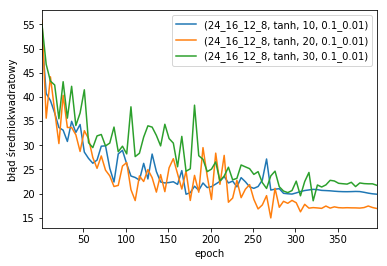

In [112]:
n = 5
data['testing'][l[0]]['test_loss'].iloc[::n].plot(label=l[0])
data['testing'][l[2]]['test_loss'].iloc[::n].plot(label=l[2])
data['testing'][l[1]]['test_loss'].iloc[::n].plot(label=l[1])
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

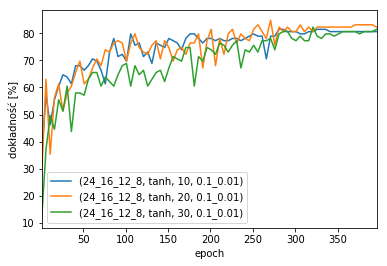

In [113]:
(100 * data['testing'][l[0]])['test_accuracy'].iloc[::n].plot(label=l[0])
(100 * data['testing'][l[2]])['test_accuracy'].iloc[::n].plot(label=l[2])
(100 * data['testing'][l[1]])['test_accuracy'].iloc[::n].plot(label=l[1])
plt.legend()
plt.ylabel('dokładność [%]')

In [116]:
df0 = data['testing'][l[0]]
df1 = data['testing'][l[1]]
df2 = data['testing'][l[2]]
print(df1.columns)
df = pd.concat([df0, df2, df1], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.353 & 52.640 & 0.277 & 55.873 & 0.118 & 55.034 \\ \hline
10 & 0.538 & 39.613 & 0.487 & 39.530 & 0.345 & 52.538 \\ \hline
20 & 0.571 & 33.717 & 0.580 & 33.959 & 0.555 & 36.910 \\ \hline
30 & 0.605 & 33.379 & 0.597 & 32.794 & 0.664 & 32.991 \\ \hline
40 & 0.664 & 33.391 & 0.672 & 28.346 & 0.580 & 35.834 \\ \hline
50 & 0.613 & 35.795 & 0.630 & 30.813 & 0.630 & 33.222 \\ \hline
60 & 0.689 & 30.368 & 0.655 & 27.470 & 0.655 & 30.992 \\ \hline
70 & 0.647 & 30.664 & 0.756 & 24.646 & 0.605 & 34.815 \\ \hline
80 & 0.723 & 25.034 & 0.664 & 27.952 & 0.622 & 35.889 \\ \hline
90 & 0.613 & 34.623 & 0.756 & 20.232 & 0.622 & 32.761 \\ \hline
100 & 0.689 & 25.934 & 0.748 & 24.249 & 0.672 & 27.784 \\ \hline
110 & 0.790 & 20.253 & 0.748 & 20.231 & 0.639 & 35.127 \\ \hline
120 & 0.773 & 24.424 & 0.756 & 22.806 & 0.647 & 31.005 \\ \hline
130 & 0.706 & 26.605 & 0.765 & 20.004 & 0.538 & 35.759 \\ \hline
140 & 0.739 & 24.553 & 0.697 & 25.398 & 0.664 &

# tanh arch

model(shape='16_12_8', activation='tanh', features='30', learning_rate='0.2_0.2')
model(shape='8', activation='tanh', features='30', learning_rate='0.2_0.2')
model(shape='16_8', activation='tanh', features='30', learning_rate='0.2_0.2')


3

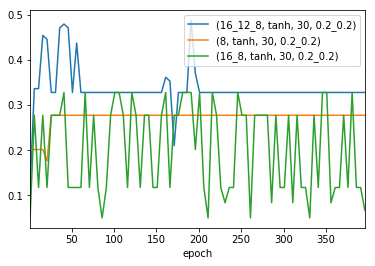

In [201]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['16_12_8', '16_8', '8']
        or k.activation not in ['tanh']
        or k.features not in ['30']
        or k.learning_rate not in ['0.2_0.2']
#         or v['test_accuracy'].iloc[-1] > .8
#         or v['test_accuracy'].max() > .3
       ):
        continue
    v['test_accuracy'].iloc[::5].plot(label=k)
#     print(k)
    l.append(k)
plt.legend()
for i in l: print(i)
len(l)

Text(0,0.5,'błąd średniokwadratowy')

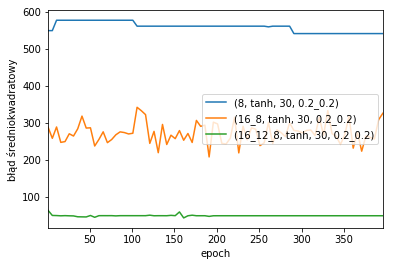

In [202]:
n = 5
data['testing'][l[1]]['test_loss'].iloc[::n].plot(label=l[1])
data['testing'][l[2]]['test_loss'].iloc[::n].plot(label=l[2])
data['testing'][l[0]]['test_loss'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

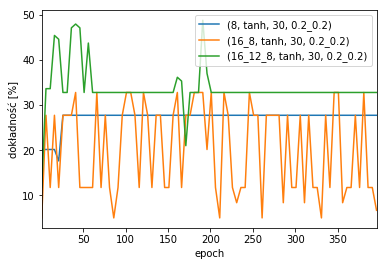

In [203]:
(100 * data['testing'][l[1]])['test_accuracy'].iloc[::n].plot(label=l[1])
(100 * data['testing'][l[2]])['test_accuracy'].iloc[::n].plot(label=l[2])
(100 * data['testing'][l[0]])['test_accuracy'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('dokładność [%]')

In [204]:
df0 = data['testing'][l[0]]
df1 = data['testing'][l[1]]
df2 = data['testing'][l[2]]
print(df1.columns)
df = pd.concat([df1, df2, df0], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.202 & 548.499 & 0.050 & 287.852 & 0.118 & 63.359 \\ \hline
10 & 0.202 & 576.500 & 0.328 & 237.090 & 0.319 & 48.922 \\ \hline
20 & 0.193 & 576.500 & 0.118 & 277.368 & 0.294 & 48.806 \\ \hline
30 & 0.277 & 576.500 & 0.118 & 220.278 & 0.328 & 48.924 \\ \hline
40 & 0.277 & 576.500 & 0.118 & 271.187 & 0.328 & 49.436 \\ \hline
50 & 0.277 & 576.500 & 0.277 & 268.174 & 0.538 & 47.290 \\ \hline
60 & 0.277 & 576.500 & 0.328 & 259.154 & 0.353 & 50.235 \\ \hline
70 & 0.277 & 576.500 & 0.328 & 292.961 & 0.328 & 48.984 \\ \hline
80 & 0.277 & 576.500 & 0.277 & 259.343 & 0.395 & 48.063 \\ \hline
90 & 0.277 & 576.500 & 0.277 & 247.395 & 0.328 & 48.988 \\ \hline
100 & 0.277 & 576.499 & 0.277 & 278.024 & 0.328 & 48.974 \\ \hline
110 & 0.277 & 560.500 & 0.118 & 293.126 & 0.328 & 48.972 \\ \hline
120 & 0.277 & 560.500 & 0.118 & 318.174 & 0.328 & 47.771 \\ \hline
130 & 0.277 & 560.500 & 0.118 & 317.897 & 0.328 & 48.945 \\ \hline
140 & 0.277 & 560.5

# tanh ?

model(shape='24_16_12_8', activation='tanh', features='30', learning_rate='0.2_0.2')
model(shape='24_16_12_8', activation='tanh', features='30', learning_rate='0.1_0.1')
model(shape='24_16_12_8', activation='tanh', features='30', learning_rate='0.2_0.001')


3

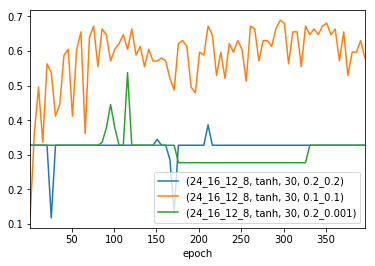

In [187]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['24_16_12_8']
        or k.activation not in ['tanh']
        or k.features not in ['30']
        or k.learning_rate not in ['0.2_0.2', '0.2_0.001', '0.1_0.1']
#         or v['test_accuracy'].iloc[-1] > .8
#         or v['test_accuracy'].max() > .3
       ):
        continue
    v['test_accuracy'].iloc[::5].plot(label=k)
#     print(k)
    l.append(k)
plt.legend()
for i in l: print(i)
len(l)

Text(0,0.5,'błąd średniokwadratowy')

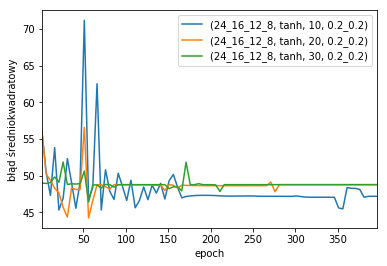

In [178]:
n = 5
data['testing'][l[1]]['test_loss'].iloc[::n].plot(label=l[1])
data['testing'][l[2]]['test_loss'].iloc[::n].plot(label=l[2])
data['testing'][l[0]]['test_loss'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

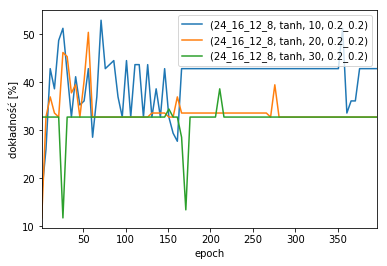

In [179]:
(100 * data['testing'][l[1]])['test_accuracy'].iloc[::n].plot(label=l[1])
(100 * data['testing'][l[2]])['test_accuracy'].iloc[::n].plot(label=l[2])
(100 * data['testing'][l[0]])['test_accuracy'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('dokładność [%]')

In [174]:
df0 = data['testing'][l[0]]
df1 = data['testing'][l[1]]
df2 = data['testing'][l[2]]
print(df1.columns)
df = pd.concat([df1, df2, df0], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.202 & 548.499 & 0.050 & 287.852 & 0.118 & 63.359 \\ \hline
10 & 0.202 & 576.500 & 0.328 & 237.090 & 0.319 & 48.922 \\ \hline
20 & 0.193 & 576.500 & 0.118 & 277.368 & 0.294 & 48.806 \\ \hline
30 & 0.277 & 576.500 & 0.118 & 220.278 & 0.328 & 48.924 \\ \hline
40 & 0.277 & 576.500 & 0.118 & 271.187 & 0.328 & 49.436 \\ \hline
50 & 0.277 & 576.500 & 0.277 & 268.174 & 0.538 & 47.290 \\ \hline
60 & 0.277 & 576.500 & 0.328 & 259.154 & 0.353 & 50.235 \\ \hline
70 & 0.277 & 576.500 & 0.328 & 292.961 & 0.328 & 48.984 \\ \hline
80 & 0.277 & 576.500 & 0.277 & 259.343 & 0.395 & 48.063 \\ \hline
90 & 0.277 & 576.500 & 0.277 & 247.395 & 0.328 & 48.988 \\ \hline
100 & 0.277 & 576.499 & 0.277 & 278.024 & 0.328 & 48.974 \\ \hline
110 & 0.277 & 560.500 & 0.118 & 293.126 & 0.328 & 48.972 \\ \hline
120 & 0.277 & 560.500 & 0.118 & 318.174 & 0.328 & 47.771 \\ \hline
130 & 0.277 & 560.500 & 0.118 & 317.897 & 0.328 & 48.945 \\ \hline
140 & 0.277 & 560.5